# Exploratory Data Analysis: Max-Planck Society

In [56]:
import pandas as pd
import numpy as np
import sklearn
import plotly.offline as py
from pandas.io.json import json_normalize
import ast
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

### reading the data

In [57]:
nipses = []
for filename in os.listdir("../data/processed/"):
    if filename.endswith(".csv"):
        nips = pd.read_csv("../data/processed/" + filename)
        nips['year'] = filename[-8:9]
        nips['year'] = nips['year'].astype("int")
        nipses.append(nips)

In [58]:
nipses = pd.concat(nipses)

In [59]:
nipses.head()

,AfId,AfN,AuId,AuN,CC,Id,Ti,Unnamed: 0,Unnamed: 0.1,Y,author,author_num,authors,error,json,logprob,paper,year
0,36258959.0,university of california san diego,2156212819,andrew ziegler,32.0,2.120914e+09,locally uniform comparison image descriptor,0,0,2012.0,"{'AfN': 'university of california san diego', ...",0,"['Andrew Ziegler', 'Eric Christiansen', 'David...",NaN,NaN,-19.320,Locally Uniform Comparison Image Descriptor,2012
1,149899117.0,max planck society,2093953614,krikamol muandet,102.0,2.136441e+09,learning from distributions via support measur...,1,1,2012.0,"{'AfN': 'max planck society', 'AuN': 'krikamol...",0,"['Krikamol Muandet', 'Kenji Fukumizu', 'France...",NaN,NaN,-18.947,Learning from Distributions via Support Measur...,2012
2,95457486.0,university of california berkeley,2069260391,ehsan elhamifar,69.0,2.138003e+09,finding exemplars from pairwise dissimilaritie...,2,2,2012.0,"{'AfN': 'university of california berkeley', '...",0,"['Ehsan Elhamifar', 'Guillermo Sapiro', 'René ...",NaN,NaN,-19.165,Finding Exemplars from Pairwise Dissimilaritie...,2012
3,142606810.0,pacific northwest national laboratory,2002801913,chad scherrer,62.0,2.138064e+09,feature clustering for accelerating parallel c...,3,3,2012.0,{'AfN': 'pacific northwest national laboratory...,0,"['Chad Scherrer', 'Ambuj Tewari', 'Mahantesh H...",NaN,NaN,-19.399,Feature Clustering for Accelerating Parallel C...,2012
4,1174212.0,university of southern california,2616799280,chuanxin minos niu,4.0,2.109328e+09,multi scale hyper time hardware emulation of h...,4,4,2012.0,"{'AfN': 'university of southern california', '...",0,"['C. M. Niu', 'Sirish Nandyala', 'Won J. Sohn'...",NaN,NaN,-20.628,Multi-scale Hyper-time Hardware Emulation of H...,2012


# general statistics

Text(0,0.5,'publication')

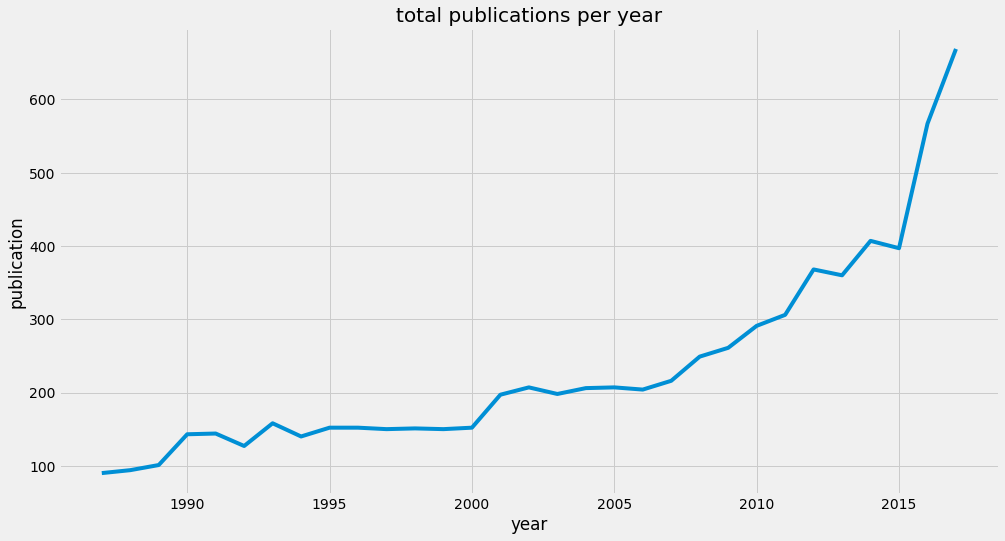

In [24]:
proceedings = nipses.groupby('year')["Ti"].nunique()
ax = proceedings.plot(title="total publications per year")
ax.set_ylabel("publication")

Text(0,0.5,'author')

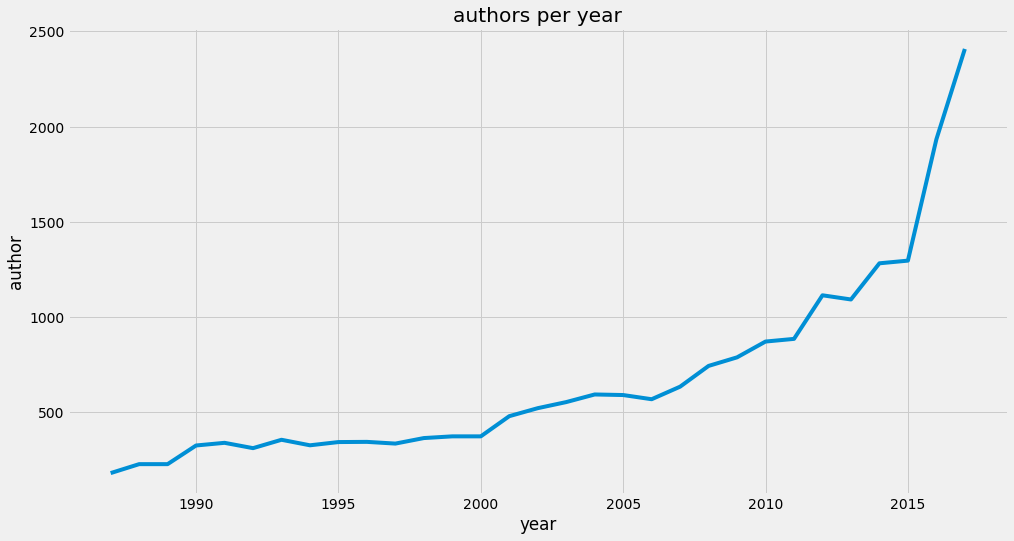

In [25]:
authors = nipses.groupby('year').size()
ax = authors.plot(title="authors per year")
ax.set_ylabel("author")

(0, 5)

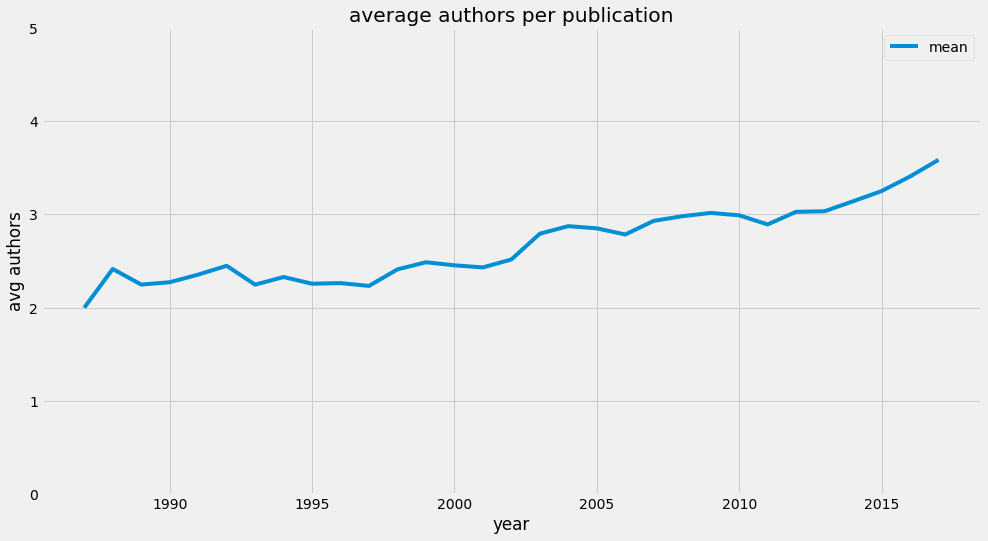

In [26]:
authorsPerPub = nipses.groupby(['year', 'Ti']).size().reset_index(name ='authorsCount')
averageAuthorsPerYear = authorsPerPub.groupby(['year'])["authorsCount"].agg(["mean"])
ax = averageAuthorsPerYear.plot(title="average authors per publication")
ax.set_ylabel("avg authors")
plt.ylim(0, 5)

In [93]:
def plot_mps_vs_rest(df, rank_column, title):
    other = df[df["AfN"] != "max planck society"].groupby("year")[rank_column].sum().reset_index()
    other["AfN"] = "other institutions"
    other = other.set_index("year")
    mps = df[df["AfN"] == "max planck society"][["AfN", rank_column]]
    other = other.append(mps)
    other = other.pivot(columns='AfN', values=rank_column).fillna(0)
    other.plot.area(title=title)

## non-adjusted mentions
### TODO: When was the MPI for intelligent systems founded? Explain spike in 2003!

In [27]:
total_mentions = nipses.groupby("year")["AfN"].value_counts().reset_index(name="authors")
total_mentions["rank"] = total_mentions.groupby('year')['authors'].rank(ascending=False).astype("int")
total_mentions = total_mentions.set_index("year")
total_mentions.head()

,AfN,authors,rank
year,,,
1987,california institute of technology,24,1
1987,bell labs,9,2
1987,massachusetts institute of technology,8,3
1987,telcordia technologies,7,4
1987,university of washington,7,4


Text(0,0.5,'avg authors')

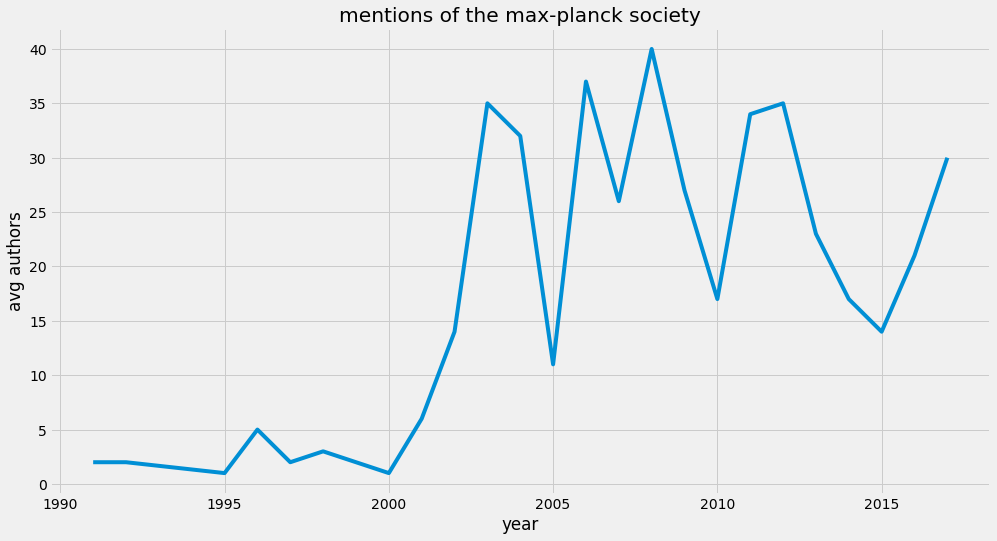

In [28]:
rank_mps = total_mentions[total_mentions["AfN"]=="max planck society"]
ax = rank_mps["authors"].plot(title="mentions of the max-planck society")
ax.set_ylabel("avg authors")

### insight: number of mentions of the max-planck society stays nearly constant after ~ 2003

Text(0,0.5,'avg authors')

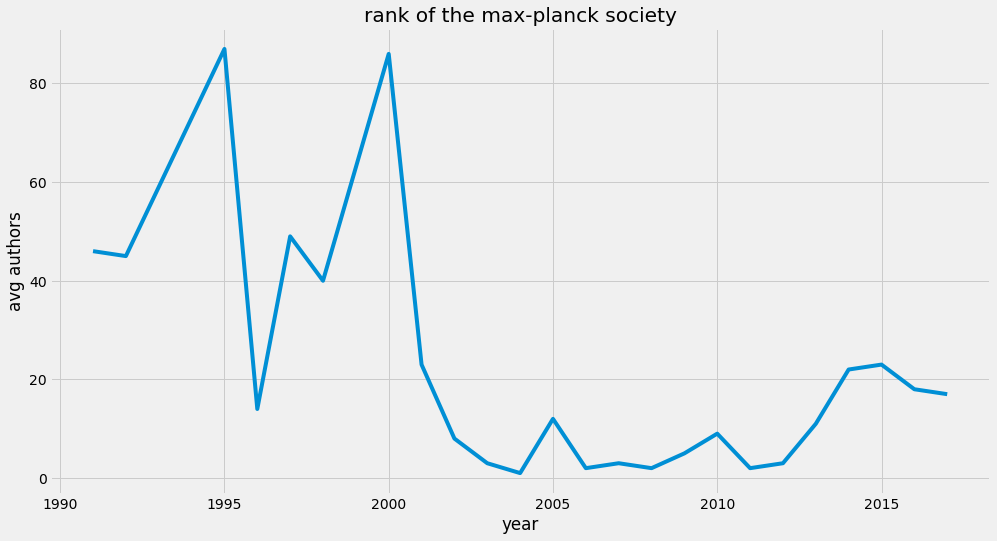

In [29]:
rank_mps = total_mentions[total_mentions["AfN"]=="max planck society"]
ax = rank_mps["rank"].plot(title="rank of the max-planck society")
ax.set_ylabel("avg authors")

(0, 20)

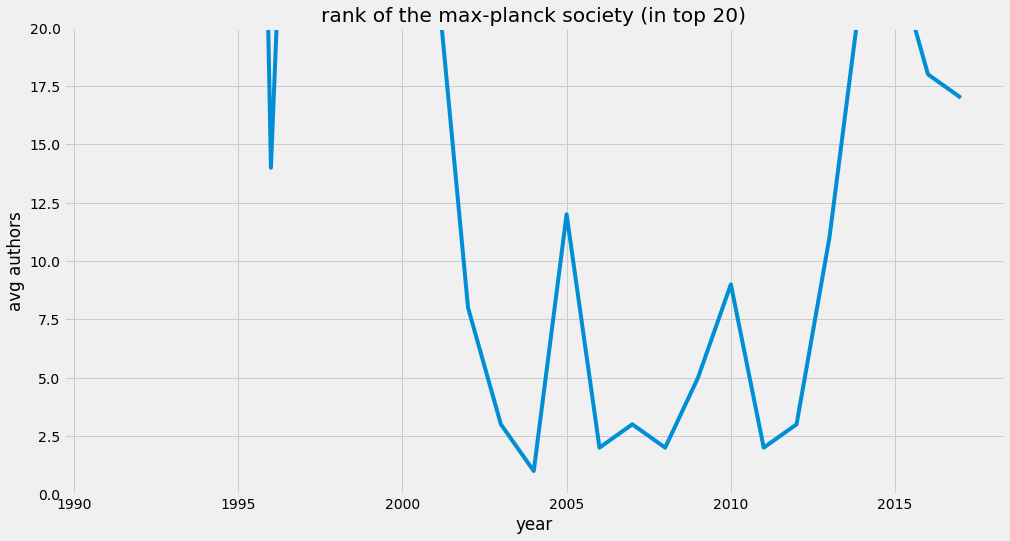

In [30]:
ax = rank_mps["rank"].plot(title="rank of the max-planck society (in top 20)")
ax.set_ylabel("avg authors")
plt.ylim(0, 20)

(0, 20)

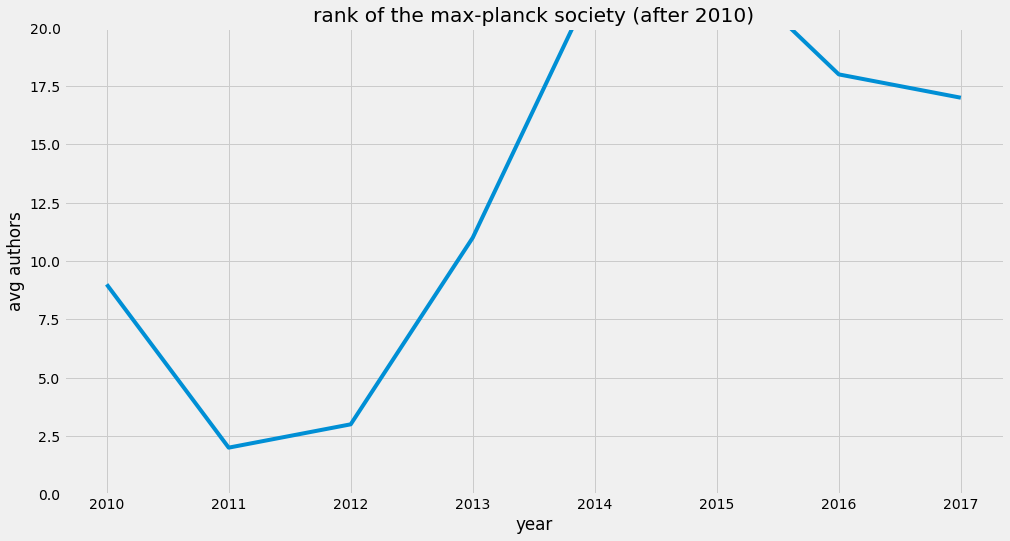

In [31]:
ax = rank_mps[rank_mps.index >= 2010]["rank"].plot(title="rank of the max-planck society (after 2010)")
ax.set_ylabel("avg authors")
plt.ylim(0, 20)

### domination of a few institutions?

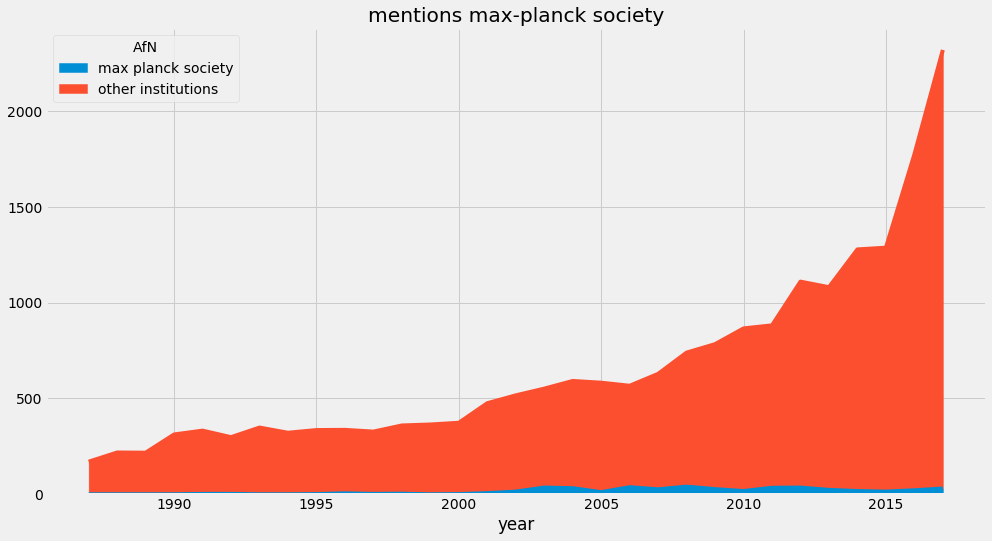

In [32]:
other_tm = total_mentions[total_mentions["AfN"] != "max planck society"].groupby("year")["authors"].sum().reset_index()
other_tm["AfN"] = "other institutions"
other_tm = other_tm.set_index("year")
mps = total_mentions[total_mentions["AfN"] == "max planck society"][["AfN", "authors"]]
other_tm = other_tm.append(mps)
other_tm = other_tm.pivot(columns='AfN', values='authors').fillna(0)
other_tm.plot.area(title="mentions max-planck society")

## total highscore 

In [33]:
total_old_mentions = nipses["AfN"].value_counts().reset_index(name="authors")
total_old_mentions.nlargest(20, "authors")

,index,authors
0,massachusetts institute of technology,898
1,carnegie mellon university,831
2,stanford university,731
3,university of california berkeley,714
4,microsoft,460
5,max planck society,435
6,princeton university,435
7,google,428
8,university of toronto,363
9,california institute of technology,353


## after 2010

In [34]:
total_mentions_2010 = nipses[nipses["year"] >= 2010]["AfN"].value_counts().reset_index(name="authors")
total_mentions_2010.nlargest(20, "authors")

,index,authors
0,carnegie mellon university,436
1,stanford university,421
2,massachusetts institute of technology,380
3,university of california berkeley,375
4,google,366
5,microsoft,297
6,university of texas at austin,266
7,princeton university,210
8,duke university,193
9,max planck society,191


## total individual researchers

In [35]:
total_author_affiliations = nipses.drop_duplicates("AuN")["AfN"].value_counts().reset_index(name="authors")
total_author_affiliations.nlargest(10, "authors")

,index,authors
0,massachusetts institute of technology,307
1,stanford university,305
2,carnegie mellon university,300
3,university of california berkeley,239
4,princeton university,181
5,microsoft,177
6,google,171
7,max planck society,146
8,california institute of technology,141
9,university of california san diego,141


## adjusting for multiple authors

In [36]:
adj_authors = nipses.set_index(["year", "Ti", "AuN"])
adj_authors["adj_authors"] = 1
adj_authors["adj_authors"] = adj_authors["adj_authors"].div(adj_authors.groupby(['year','Ti'])["adj_authors"].transform('sum'))

In [50]:
adj_authors.head()

AfId  \
year Ti                                                 AuN                               
2012 locally uniform comparison image descriptor        andrew ziegler       36258959.0   
     learning from distributions via support measure... krikamol muandet    149899117.0   
     finding exemplars from pairwise dissimilarities... ehsan elhamifar      95457486.0   
     feature clustering for accelerating parallel co... chad scherrer       142606810.0   
     multi scale hyper time hardware emulation of hu... chuanxin minos niu    1174212.0   

                                                                                                              AfN  \
year Ti                                                 AuN                                                         
2012 locally uniform comparison image descriptor        andrew ziegler         university of california san diego   
     learning from distributions via support measure... krikamol muandet                       max planck society   
     finding exemplars from pairwise dissimilarities... ehsan elhamifar         university of california berkeley   
     feature clustering for accelerating parallel co... chad scherrer       pacific northwest national laboratory   
     multi scale hyper time hardware emulation of hu... chuanxin minos niu      university of southern california   

                                                                                  AuId  \
year Ti                                                 AuN                              
2012 locally uniform comparison image descriptor        andrew ziegler      2156212819   
     learning from distributions via support measure... krikamol muandet    2093953614   
     finding exemplars from pairwise dissimilarities... ehsan elhamifar     2069260391   
     feature clustering for accelerating parallel co... chad scherrer       2002801913   
     multi scale hyper time hardware emulation of hu... chuanxin minos niu  2616799280   

                                                                               CC  \
year Ti                                                 AuN                         
2012 locally uniform comparison image descriptor        andrew ziegler       32.0   
     learning from distributions via support measure... krikamol muandet    102.0   
     finding exemplars from pairwise dissimilarities... ehsan elhamifar      69.0   
     feature clustering for accelerating parallel co... chad scherrer        62.0   
     multi scale hyper time hardware emulation of hu... chuanxin minos niu    4.0   

                                                                                      Id  \
year Ti                                                 AuN                                
2012 locally uniform comparison image descriptor        andrew ziegler      2.120914e+09   
     learning from distributions via support measure... krikamol muandet    2.136441e+09   
     finding exemplars from pairwise dissimilarities... ehsan elhamifar     2.138003e+09   
     feature clustering for accelerating parallel co... chad scherrer       2.138064e+09   
     multi scale hyper time hardware emulation of hu... chuanxin minos niu  2.109328e+09   

                                                                            Unnamed: 0  \
year Ti                                                 AuN                              
2012 locally uniform comparison image descriptor        andrew ziegler               0   
     learning from distributions via support measure... krikamol muandet             1   
     finding exemplars from pairwise dissimilarities... ehsan elhamifar              2   
     feature clustering for accelerating parallel co... chad scherrer                3   
     multi scale hyper time hardware emulation of hu... chuanxin minos niu           4   

                                                                            Unnamed: 0.1  \
year Ti                       

sanity check

In [61]:
adj_authors.groupby("Ti")["adj_authors"].sum().head()

Ti
1 norm support vector machines                                                                                       1.0
2007 special issue learning grammatical structure with echo state networks                                           1.0
2008 special issue a pseudo equilibrium thermodynamic model of information processing in nonlinear brain dynamics    1.0
2d observers for human 3d object recognition                                                                         1.0
3 state neurons for contextual processing                                                                            1.0
Name: adj_authors, dtype: float64

## ajusted rank per year

In [95]:
rank_mentions_adj = adj_authors.groupby(["year", "AfN"])["adj_authors"].sum().reset_index(name="adj_authors")
rank_mentions_adj["rank"] = rank_mentions_adj.groupby('year')['adj_authors'].rank(ascending=False).astype("int")
rank_mentions_adj = rank_mentions_adj.set_index("year")
modern_adj = rank_mentions_adj[rank_mentions_adj.index >= 2003]
rank_mentions_adj[rank_mentions_adj.index == 1987].nsmallest(10, 'rank')

,AfN,adj_authors,rank
year,,,
1987,california institute of technology,10.000000,1
1987,massachusetts institute of technology,4.500000,2
1987,bell labs,4.000000,3
1987,carnegie mellon university,3.500000,4
1987,telcordia technologies,3.500000,4
1987,stanford university,3.333333,6
1987,university of washington,2.666667,7
1987,university of california berkeley,2.250000,8
1987,johns hopkins university,2.000000,10


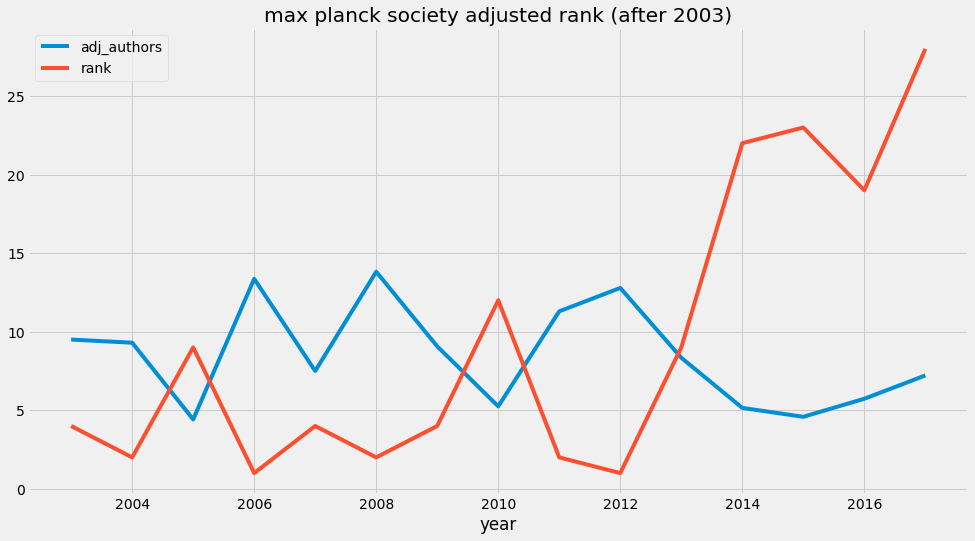

In [97]:
modern_adj[modern_adj["AfN"] == "max planck society"].plot(title="max planck society adjusted rank (after 2003)")

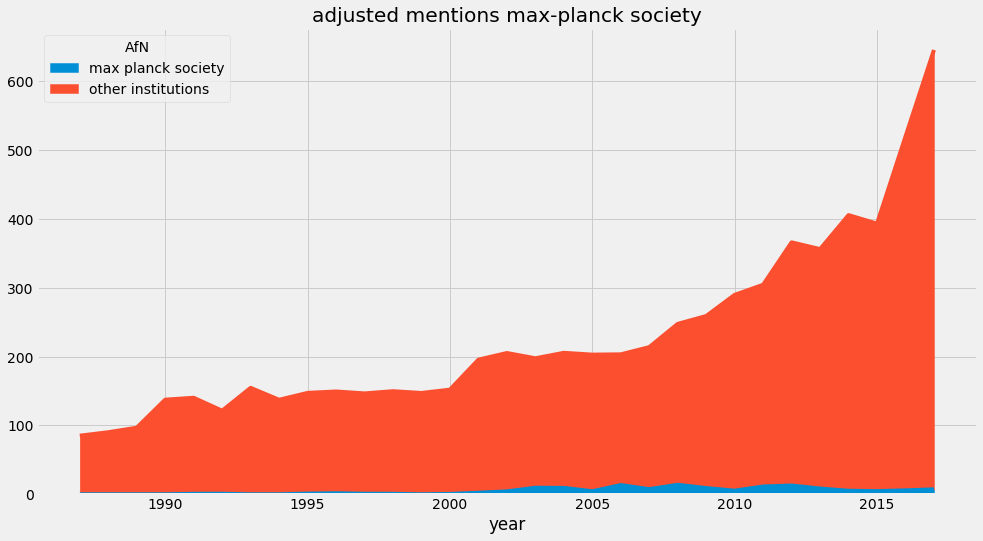

In [94]:
plot_mps_vs_rest(rank_mentions_adj, "adj_authors", "adjusted mentions max-planck society")

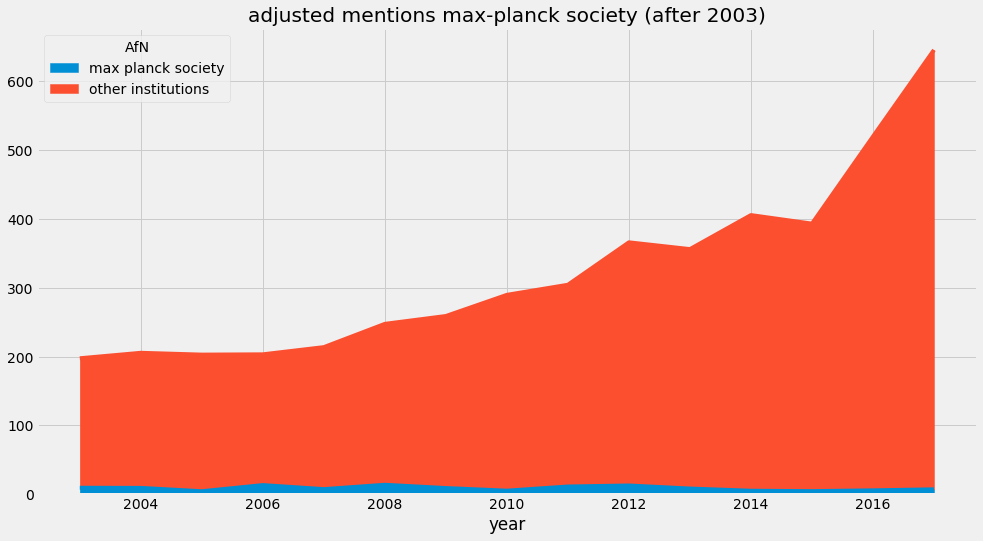

In [98]:
plot_mps_vs_rest(modern_adj, "adj_authors", "adjusted mentions max-planck society (after 2003)")